In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

In [39]:
data = pd.read_csv('LoanData.csv')

In [40]:
data.shape

(614, 13)

In [41]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [44]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [45]:
data = data.iloc[: , 1:]
data.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [46]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [47]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [49]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

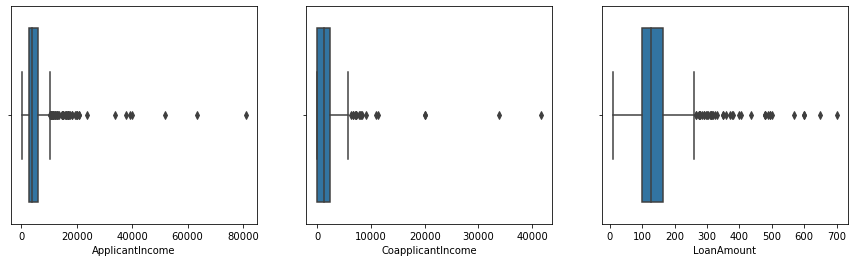

In [50]:
plt.rcParams['figure.figsize'] = ('15,4')

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.show()

In [51]:
# removing outliers in the data
# for the applicantincome column the mean value is at 5400 and 75th percentile is at 6000 but the max value given is at 81000
# for the coapplicantincome column the mean value is at 1621 and 75th percentile is at 2297 but the max value given is at 41000
# for the loanamount column the mean value is at 146 and 75th percentile is at 168 but the max value given is at 700

data = data[data['ApplicantIncome'] < 40000]
data.shape

(611, 12)

In [52]:
data = data[data['LoanAmount'] < 550]
data.shape

(607, 12)

In [53]:
data = data[data['CoapplicantIncome'] < 12000]
data.shape

(603, 12)

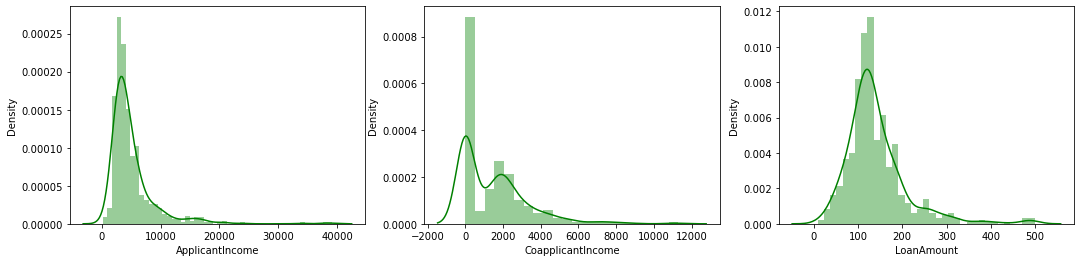

In [54]:
# Applying Univariate analysis
plt.rcParams['figure.figsize'] = ('18,4')

plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.show()

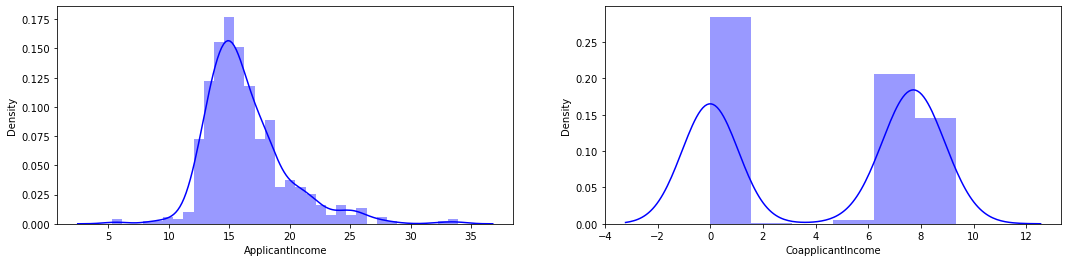

In [55]:
# Now we remove skewness from the applicantincome and coapplicantincome columns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = ('18,4')

data['ApplicantIncome'] = np.cbrt(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1, 2, 1)
sns.distplot(data['ApplicantIncome'], color = 'blue')

plt.subplot(1, 2, 2)
sns.distplot(data['CoapplicantIncome'], color = 'blue')

plt.show()

[]

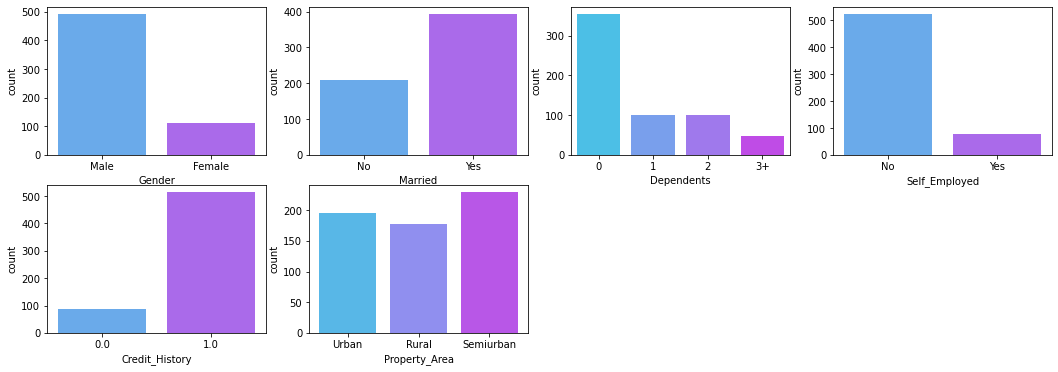

In [56]:
# Univariate analysis on categorical columns

plt.rcParams['figure.figsize'] = ('18,6')

plt.subplot(2, 4, 1)
sns.countplot(data['Gender'], palette = 'cool')

plt.subplot(2, 4, 2)
sns.countplot(data['Married'], palette = 'cool' )

plt.subplot(2, 4, 3)
sns.countplot(data['Dependents'], palette = 'cool' )

plt.subplot(2, 4, 4)
sns.countplot(data['Self_Employed'], palette = 'cool' )

plt.subplot(2, 4, 5)
sns.countplot(data['Credit_History'], palette = 'cool' )

plt.subplot(2, 4, 6)
sns.countplot(data['Property_Area'], palette = 'cool' )

plt.plot()

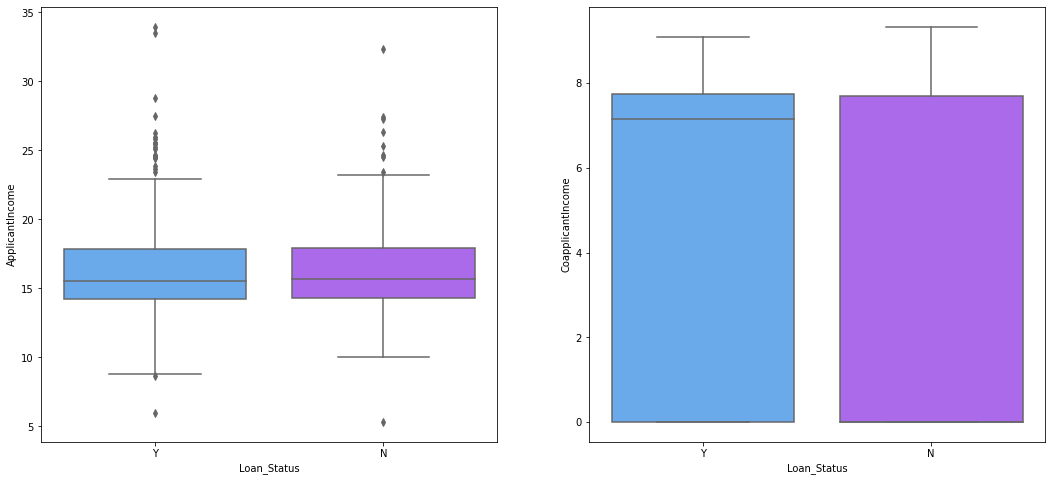

In [57]:
# Impact of applicant income, coapplicant income, loan amount on loan status

plt.rcParams['figure.figsize'] = ('18,8')

plt.subplot(1, 2, 1)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette = 'cool')

plt.subplot(1, 2, 2)
sns.boxplot(data['Loan_Status'], data['CoapplicantIncome'], palette = 'cool')

plt.show()

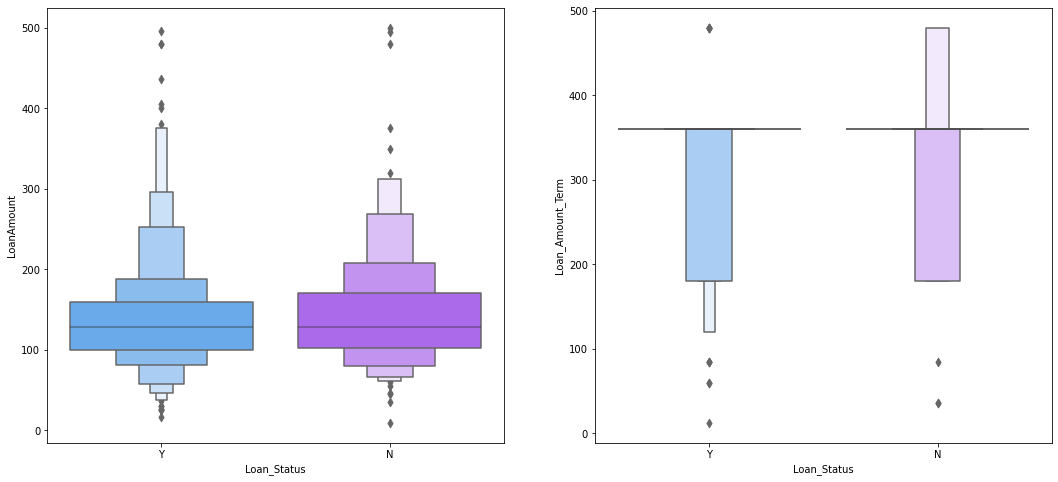

In [58]:
plt.rcParams['figure.figsize'] = ('18,8')

plt.subplot(1, 2, 1)
sns.boxenplot(data['Loan_Status'], data['LoanAmount'], palette = 'cool')

plt.subplot(1, 2, 2)
sns.boxenplot(data['Loan_Status'], data['Loan_Amount_Term'], palette = 'cool')

plt.show()

In [59]:
# Impact of Categorical columns on loan status

print('Marriage')
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print('Gender')
print(pd.crosstab(data['Loan_Status'], data['Gender']))
print('\n')

print('Dependents')
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print('Education')
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print('Self_Employed')
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print('Property_Area')
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))
print('\n')

Marriage
Married       No  Yes
Loan_Status          
N             77  110
Y            132  284


Gender
Gender       Female  Male
Loan_Status              
N                36   151
Y                74   342


Dependents
Dependents     0   1   2  3+
Loan_Status                 
N            111  36  24  16
Y            244  65  76  31


Education
Education    Graduate  Not Graduate
Loan_Status                        
N                 135            52
Y                 334            82


Self_Employed
Self_Employed   No  Yes
Loan_Status            
N              162   25
Y              362   54


Property_Area
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 67         54     66
Y                110        176    130




<AxesSubplot:>

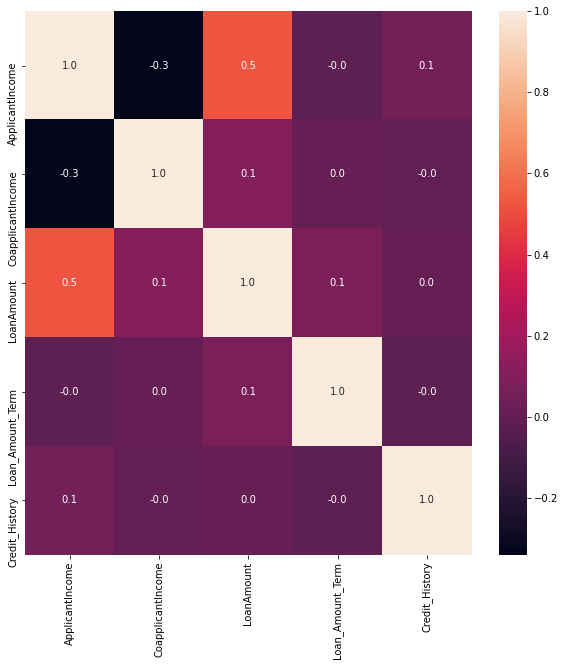

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, fmt = '0.1f')

In [62]:
# Since the machine learning model cannot accept strings, we need to encode the categorical columns
# since we know that the loan id column is not required, we delete that

data['Gender'] = data['Gender'].replace(('Male', 'Female'), (1,0)) 
data['Married'] = data['Married'].replace(('Yes', 'No'), (1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'), (1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'), (1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'), (1,0))
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0,1,2,3))
data['Property_Area'] = data['Property_Area'].replace(('Rural', 'Semiurban', 'Urban'), (0,1,2))
data['Credit_History'] = data['Credit_History'].replace(('0.0', '1.0'), (0, 1))

In [63]:
# Splitting the target column from the data


y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

print(x.shape)
print(y.shape)

(603, 11)
(603,)


In [64]:
from imblearn.over_sampling import RandomOverSampler

sm = RandomOverSampler(random_state=2)
sm.fit(x,y)
x_res, y_res = sm.fit_resample(x, y)
y_res = pd.DataFrame(y_res)

print(x_res.shape)
print(y_res.shape)

(832, 11)
(832, 1)


In [65]:
#splitting the test data from the training data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(665, 11)
(665, 1)
(167, 11)
(167, 1)


In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7293233082706767
0.7844311377245509


In [68]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

1.0
0.7485029940119761


In [69]:
# we see that logistic regression isn't the best model for the data
# we now apply gradient boosting

from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

1.0
0.9161676646706587


In [70]:
from xgboost import XGBClassifier

model3 = XGBClassifier(eta = 0.3, booster='gbtree', scale_pos_weight = 2.2, min_child_weight = 1)
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)
print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))

1.0
0.9401197604790419


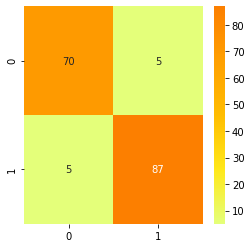

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.95      0.95      0.95        92

    accuracy                           0.94       167
   macro avg       0.94      0.94      0.94       167
weighted avg       0.94      0.94      0.94       167

0.9456521739130435
0.9401197604790419


In [71]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

cm = confusion_matrix(y_test, y_pred3)
plt.rcParams['figure.figsize'] = (4,4)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred3)
print(cr)

score = f1_score(y_test, y_pred3)
print(score)
accuracy = accuracy_score(y_test, y_pred3)
print(accuracy)

In [ ]:
# M.Vinay Krishna